### <center>Rizal Dwi Kurniawan</center>
#### <center>F1D022091</center>

# Here you can put your extraordinary code

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

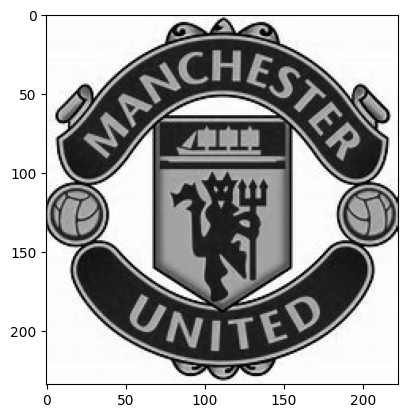

In [55]:
MUnyuk = plt.imread('../assets/manchester_united.jpeg')
MUnyuk_gray = cv.cvtColor(MUnyuk, cv.COLOR_BGR2GRAY)
plt.imshow(MUnyuk_gray, cmap='gray')

In [56]:
kernel_3x3 = np.full((3,3), 1/9)
kernel_9x9 = np.full((9,9), 1/81)

In [57]:
height, width = MUnyuk_gray.shape[0], MUnyuk_gray.shape[1]

In [58]:
def mean(img, kernel):
    hasil = np.zeros_like(img)
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[1]//2, width-kernel.shape[1]//2):
            help = img[i - kernel.shape[0]//2:i + kernel.shape[0]//2 + 1, j - kernel.shape[0]//2:j + kernel.shape[0]//2 + 1]

            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum+= kernel[k, l] * help[k, l]
            hasil[i, j] = sum
    return hasil

In [59]:
def median(img, kernel):
    hasil = np.zeros((height, width), dtype=np.uint8)
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[0]//2, width-kernel.shape[0]//2):
            temp = []
            for k in range(-kernel.shape[0]//2, kernel.shape[0]//2+1):
                for l in range(-kernel.shape[0]//2, kernel.shape[0]//2+1):
                    temp += [img[i+k][j+l]]
            
            n = len(temp)
            for p in range(n - 1):
                min_indeks = p
                for q in range(p + 1, n):
                    if temp[q] < temp[min_indeks]:
                        min_indeks = q
                temp_p = temp[p]
                temp[p] = temp[min_indeks]
                temp[min_indeks] = temp_p
            
            Median = temp[kernel.shape[0]**2//2]
            if kernel.shape[0]**2 % 2 == 0:
                Median = (temp[kernel.shape[0]**2//2 - 1] + temp[kernel.shape[0]**2//2]) // 2
            else:
                Median = temp[kernel.shape[0]**2//2]
            hasil[i][j] = Median

In [60]:
def modus(img, kernel):
    hasil = np.zeros((height, width), dtype=np.uint8)
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[1]//2, width-kernel.shape[1]//2):
            temp = []
            for k in range(-kernel.shape[0]//2, kernel.shape[0]//2+1):
                for l in range(-kernel.shape[1]//2, kernel.shape[1]//2+1):
                    temp += [img[i+k][j+l]]
            temp_angka = np.zeros(256)
            for val in temp:
                temp_angka[val] += 1
            max_angka = -1
            max_val = -1

            for val in range(256):
                temps_angka = temp_angka[val]
                if temps_angka > max_angka:
                    max_angka = temps_angka
                    max_val = val
            hasil[i][j] = max_val

    return hasil
            

In [63]:
mean_3x3 = mean(MUnyuk_gray, kernel_3x3)
median_3x3 = median(MUnyuk_gray, kernel_3x3)
modus_3x3 = modus(MUnyuk_gray, kernel_3x3)
mean_9x9 = mean(MUnyuk_gray, kernel_9x9)
median_9x9 = median(MUnyuk_gray, kernel_9x9)
modus_9x9 = modus(MUnyuk_gray, kernel_9x9)

Text(0.5, 1.0, 'Modus 9x9')

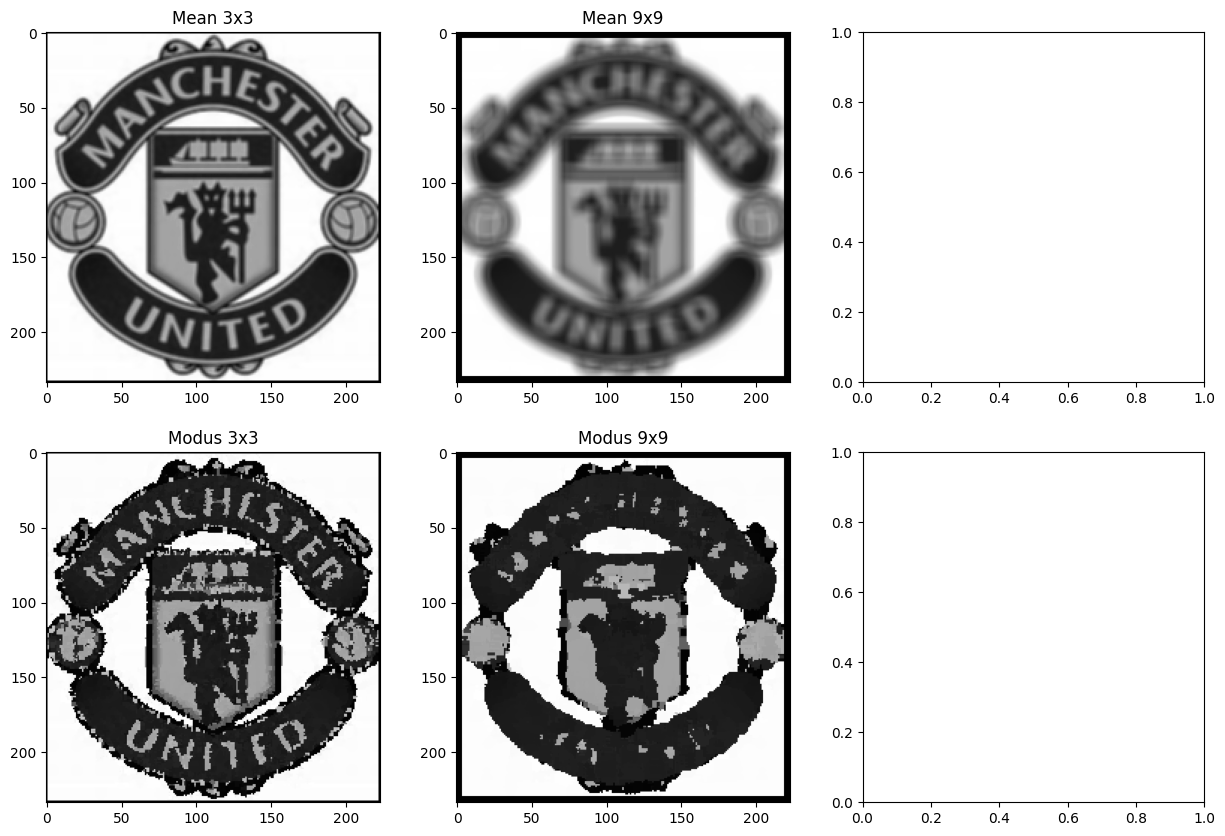

In [75]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(mean_3x3, cmap='gray')
axes[0, 0].set_title('Mean 3x3')
axes[0, 1].imshow(mean_9x9, cmap='gray')
axes[0, 1].set_title('Mean 9x9')
axes[1, 0].imshow(modus_3x3, cmap='gray')
axes[1, 0].set_title('Modus 3x3')
axes[1, 1].imshow(modus_9x9, cmap='gray')
axes[1, 1].set_title('Modus 9x9')
# axes[0, 2].imshow(median_3x3, cmap='gray')
# axes[0, 2].set_title('Median 3x3')
# axes[1, 2].imshow(median_9x9, cmap='gray')
# axes[1, 2].set_title('Median 9x9')